## Bachelor Thesis Data Analysis

In [2]:
#import necessary packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotnine as p9
from plotnine import ggplot
import plotnine.stats

In [ ]:
#load metadata

with open("Final Experiment Grob.csv", "r") as file:
    row = 0
    for line in file:
        print(f"row: {row} -> {line}")
        row += 1

        if row == 8:
            break

In [3]:
#load data part 1

df = pd.read_csv('Final Experiment Grob.csv', skiprows=6)

In [7]:
#beiden dataframes zu einem Gesamtframe mergen 

#df = pd.concat([df1, df2])

In [ ]:
#load data part 2

df2 = pd.read_csv('Final Experiment Fein.csv', skiprows=6)

In [453]:
df3= pd.read_csv('Model Final experiment 81-84-table.csv', skiprows=6)

In [3]:
df_male= pd.read_csv('Model Final experiment male bias-table.csv', skiprows=6)

### Dataframe preparation

In [9]:
#sort dataframe by run numbers first and then by step (within the runs)
df = df.sort_values (by = ['[run number]', '[step]'])

In [ ]:
df2= df2.sort_values (by = ['[run number]', '[step]'])

In [454]:
df3 = df3.sort_values (by = ['[run number]', '[step]'])

In [4]:
df_male = df_male.sort_values(by =['[run number]', '[step]'])

In [10]:
#rename the columns in the dataframe to more practical terms

df = df.rename(columns={
    "[run number]":"run_number",
    "[step]":"step",
    "count turtles with [sex = \"female\"]":"all_females",
    "count turtles with [sex = \"male\"]":"all_males",
    "count turtles with [sex = \"female\" and mature = true]":"mature_females",
    "count turtles with [sex = \"male\" and mature = true]":"mature_males",
})

In [ ]:
#FEIN data: rename the columns in the dataframe to more practical terms

df2 = df2.rename(columns={
    "[run number]":"run_number",
    "[step]":"step",
    "count turtles with [sex = \"female\"]":"all_females",
    "count turtles with [sex = \"male\"]":"all_males",
    "count turtles with [sex = \"female\" and mature = true]":"mature_females",
    "count turtles with [sex = \"male\" and mature = true]":"mature_males",
})

In [456]:
df3 = df3.rename(columns={
    "[run number]":"run_number",
    "[step]":"step",
    "count turtles with [sex = \"female\"]":"all_females",
    "count turtles with [sex = \"male\"]":"all_males",
    "count turtles with [sex = \"female\" and mature = true]":"mature_females",
    "count turtles with [sex = \"male\" and mature = true]":"mature_males",
    })

In [5]:
df_male = df_male.rename(columns={
    "[run number]":"run_number",
    "[step]":"step",
    "count turtles with [sex = \"female\"]":"all_females",
    "count turtles with [sex = \"male\"]":"all_males",
    "count turtles with [sex = \"female\" and mature = true]":"mature_females",
    "count turtles with [sex = \"male\" and mature = true]":"mature_males",
    })

In [6]:
#calculate data for all turtles and for all mature turtles and add to dataframe

def all_adult_turtles(row):
    return row["mature_females"] + row["mature_males"]

def all_turtles(row):
    return row["all_females"] + row["all_males"]

In [12]:
#add columns for all_mature_turtles and all_turtles to the dataframe

df["all_adult_turtles"] = df.apply(all_adult_turtles, axis=1)
df["all_turtles"] = df.apply(all_turtles, axis=1)

In [ ]:
#FEIN data: add columns for all_mature_turtles and all_turtles to the dataframe

df2["all_adult_turtles"] = df2.apply(all_adult_turtles, axis=1)
df2["all_turtles"] = df2.apply(all_turtles, axis=1)

In [457]:
df3["all_adult_turtles"] = df3.apply(all_adult_turtles, axis=1)
df3["all_turtles"] = df3.apply(all_turtles, axis=1)

In [7]:
df_male["all_adult_turtles"] = df_male.apply(all_adult_turtles, axis=1)
df_male["all_turtles"] = df_male.apply(all_turtles, axis=1)

In [458]:
df_male

,run_number,average_clutch_size,maturity_age,juvenile_mortality,adult_mortality,initial_female_ratio,max_mates,age_max,clutch_size_std,initial_population,...,chance_to_hatch,new_female_ratio,random-seed,step,all_females,all_males,mature_females,mature_males,all_adult_turtles,all_turtles
15,1,575,35,0,0.05,0.5,4,60,140,200,...,0.44,0.81,1,0,96,104,96,104,200.0,200.0
27,1,575,35,0,0.05,0.5,4,60,140,200,...,0.44,0.81,1,1,130,116,93,98,191.0,246.0
46,1,575,35,0,0.05,0.5,4,60,140,200,...,0.44,0.81,1,2,127,113,90,95,185.0,240.0
68,1,575,35,0,0.05,0.5,4,60,140,200,...,0.44,0.81,1,3,125,109,88,91,179.0,234.0
92,1,575,35,0,0.05,0.5,4,60,140,200,...,0.44,0.81,1,4,160,114,83,85,168.0,274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211995,12000,575,35,0,0.05,0.5,6,60,140,200,...,0.44,0.84,1000,596,878,162,232,44,276.0,1040.0
7211996,12000,575,35,0,0.05,0.5,6,60,140,200,...,0.44,0.84,1000,597,886,162,237,44,281.0,1048.0
7211997,12000,575,35,0,0.05,0.5,6,60,140,200,...,0.44,0.84,1000,598,891,162,233,45,278.0,1053.0
7211998,12000,575,35,0,0.05,0.5,6,60,140,200,...,0.44,0.84,1000,599,898,167,232,47,279.0,1065.0


### Functions for Analysis

In [8]:
#Funktion, um einzelne Run-Dataframes zu erstellen, nimmt run_number als Input und gibt einen kleineren Datensatz bezogen auf den Gesamtdatensatz aus

def get_run(run_number: int, datensatz) -> pd.DataFrame:
    run = datensatz.loc[df["run_number"] == run_number]
    return run

In [9]:
#simple plot for mature males, females, and all adult turtles in a specific run
#takes run dataframe as created by get_run-Funktion as input

def scenario_example_plot_with_all(run: pd.DataFrame, plot_title: str):
    plot = run.plot(x = "step", y = ["mature_females", "mature_males", "all_adult_turtles"], title = ("Example Run "+ plot_title + " Mates"), xlabel = "time step", ylabel = "number of turtles", color = ["cadetblue", "burlywood", "darkseagreen"])
    plt.ylim(0, 350)
    plt.figsize=(10,6)
    plt.legend(["mature females", "mature males", "all adults"])

    return plot

In [ ]:
#example plots: this code creates a plot for each example run number listed in the example run list
#functions get_run and scenario_example_plot_with_all are used here 

example_run_list = [1, 1903, 2963, 4123, 6290, 8102, 9008, 10654, 11433, 13333, 15987, 17263, 18765, 19002, 20020, 22222, 24242, 26789]
example_run_name_list = ["50% and 4", "60% and 4","70% and 4", "80% and 4", "90% and 4", "100% and 4","50% and 5", "60% and 5","70% and 5", "80% and 5", "90% and 5", "100% and 5", "50% and 6", "60% and 6","70% and 6", "80% and 6", "90% and 6", "100% and 6"]
dataframe_list = []

for index, number in enumerate (example_run_list):
    run_dataframe = get_run(number, df)
    dataframe_list.append(run_dataframe)
    title = example_run_name_list[index]
    scenario_example_plot_with_all(run_dataframe, title)

In [47]:
#with zip, names can be assigned to the respective dataframes in the list

for datensatz, name in zip(dataframe_list, example_run_name_list):
    globals()[name] = datensatz 

In [10]:
#this function creates a dataframe with all scenarios of a specific female ratio

def get_ratio_dataframe(ratio, datensatz):
    ratio_datensatz = datensatz.loc[datensatz["new_female_ratio"]== ratio]
    return ratio_datensatz

In [11]:
#function that creates dataframes for the respective scenarios -> with ratio and max_mates as input variables

def get_scenario_dataframe(ratio, mates, datensatz):
    ratio_datensatz = datensatz.loc[datensatz["new_female_ratio"]== ratio]
    scenario_datensatz = ratio_datensatz.loc[ratio_datensatz["max_mates"]== mates]
    return scenario_datensatz

In [12]:
#statistics_plot creates a plot of the average and variation in population number -> MATURE POPULATION! 

def statistics_plot_mature(datensatz, name, color_choice):
    plot = (
        p9.ggplot(datensatz)
        + p9.aes(x="step", y = "all_adult_turtles")
        + p9.labs(title = "Mature Population in Scenario " + name + " Mates" )
        + p9.xlab("time step (year)")
        + p9.ylab("mature turtles")
        + p9.ylim(0, 350)
        #+ p9.geom_line(color = 'darkseagreen')
        #+ p9.stat_summary(geom = 'ribbon', fun_args={'conf.int': 0.95}, alpha=0.3)
        + p9.stat_summary(geom = 'line', color = color_choice)
        + p9.theme_bw()
        + p9.theme(plot_title = p9.element_text(hjust = 0.5))

        )

    
    return plot

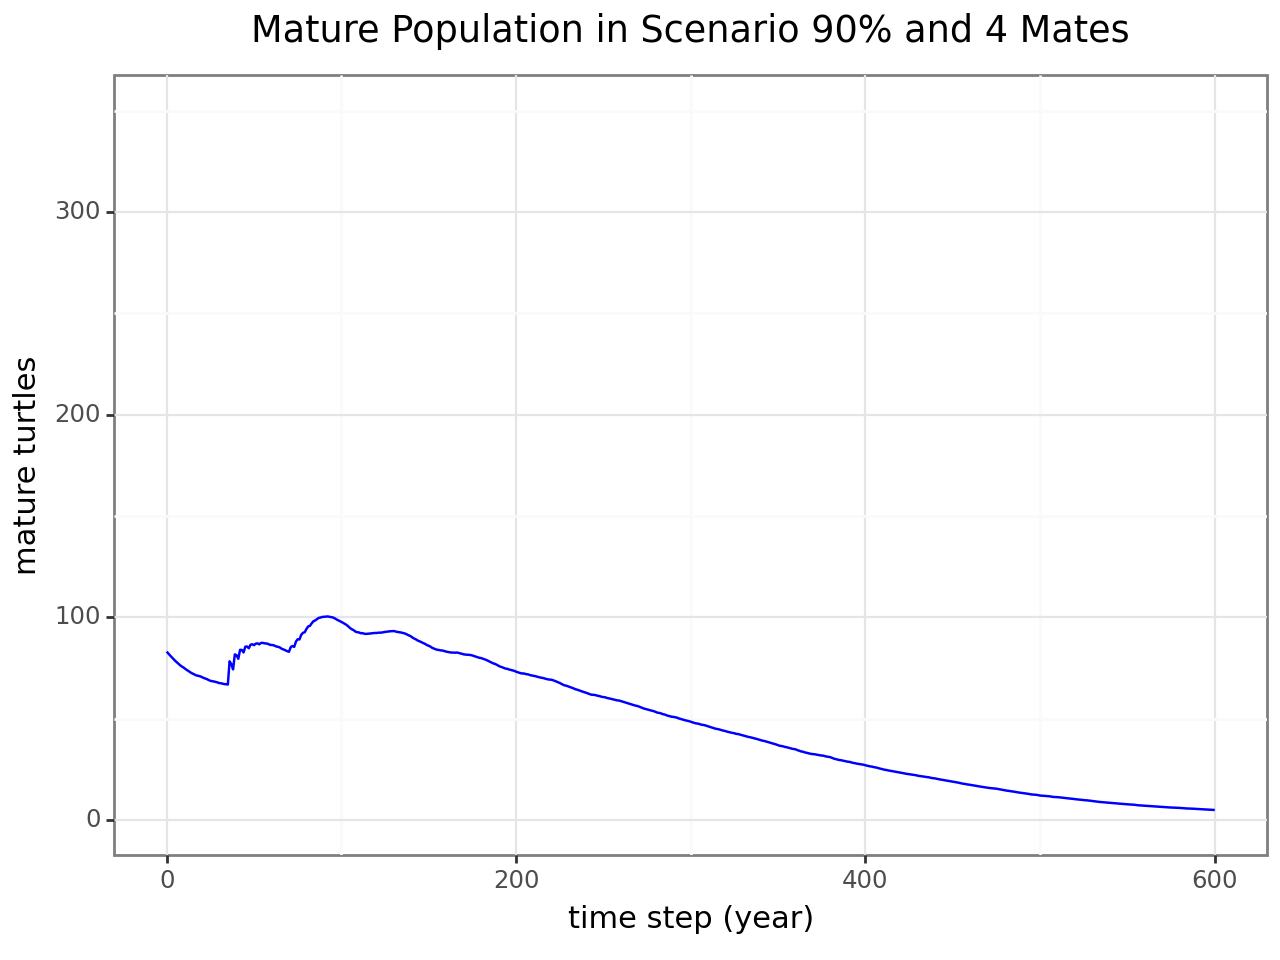

<Figure Size: (640 x 480)>

In [341]:
statistics_plot_mature(scenario_90_4, "90% and 4", "blue")

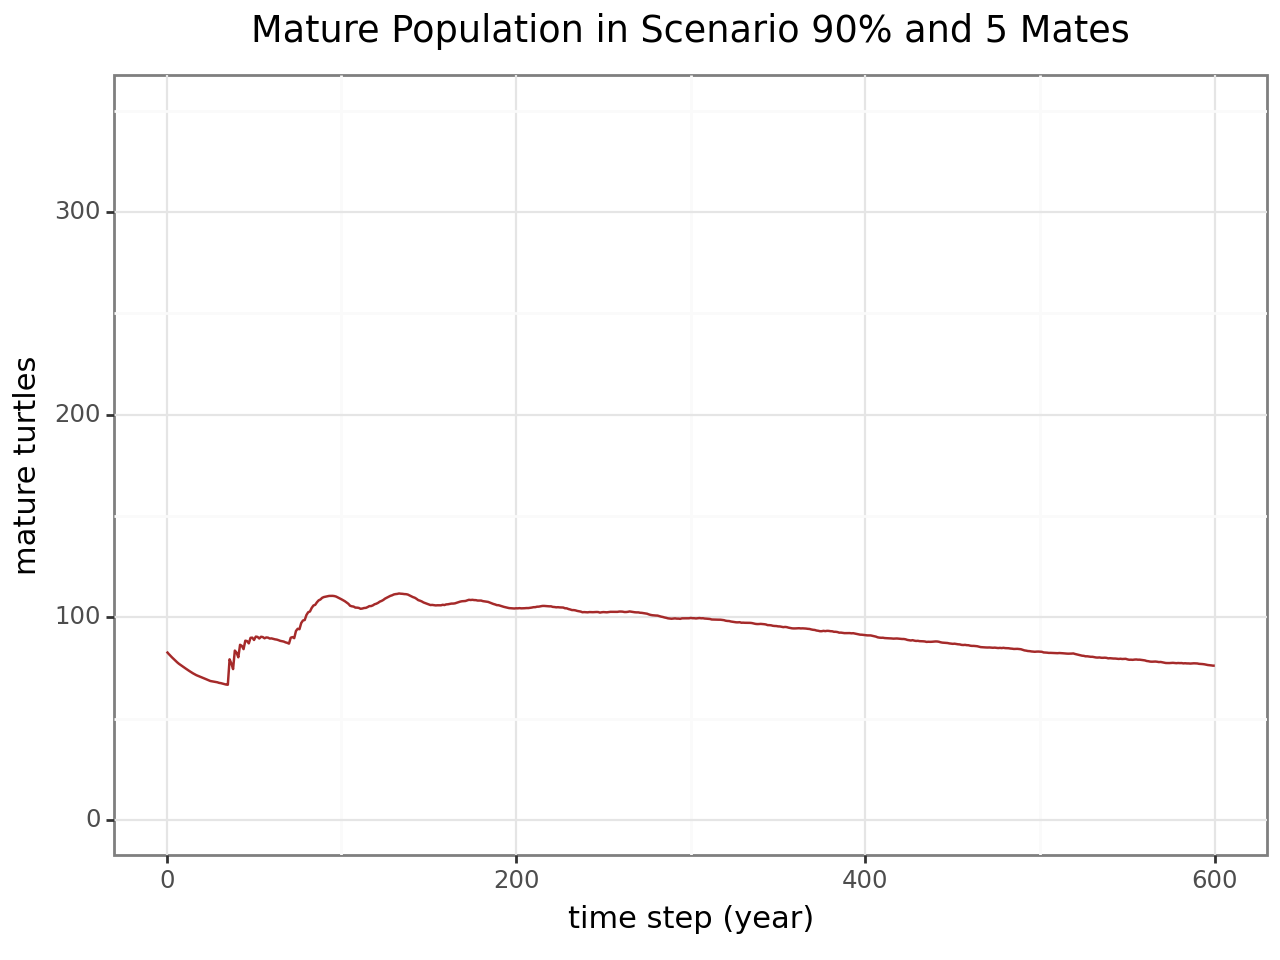

<Figure Size: (640 x 480)>

In [342]:
statistics_plot_mature(scenario_90_5, "90% and 5", "brown")

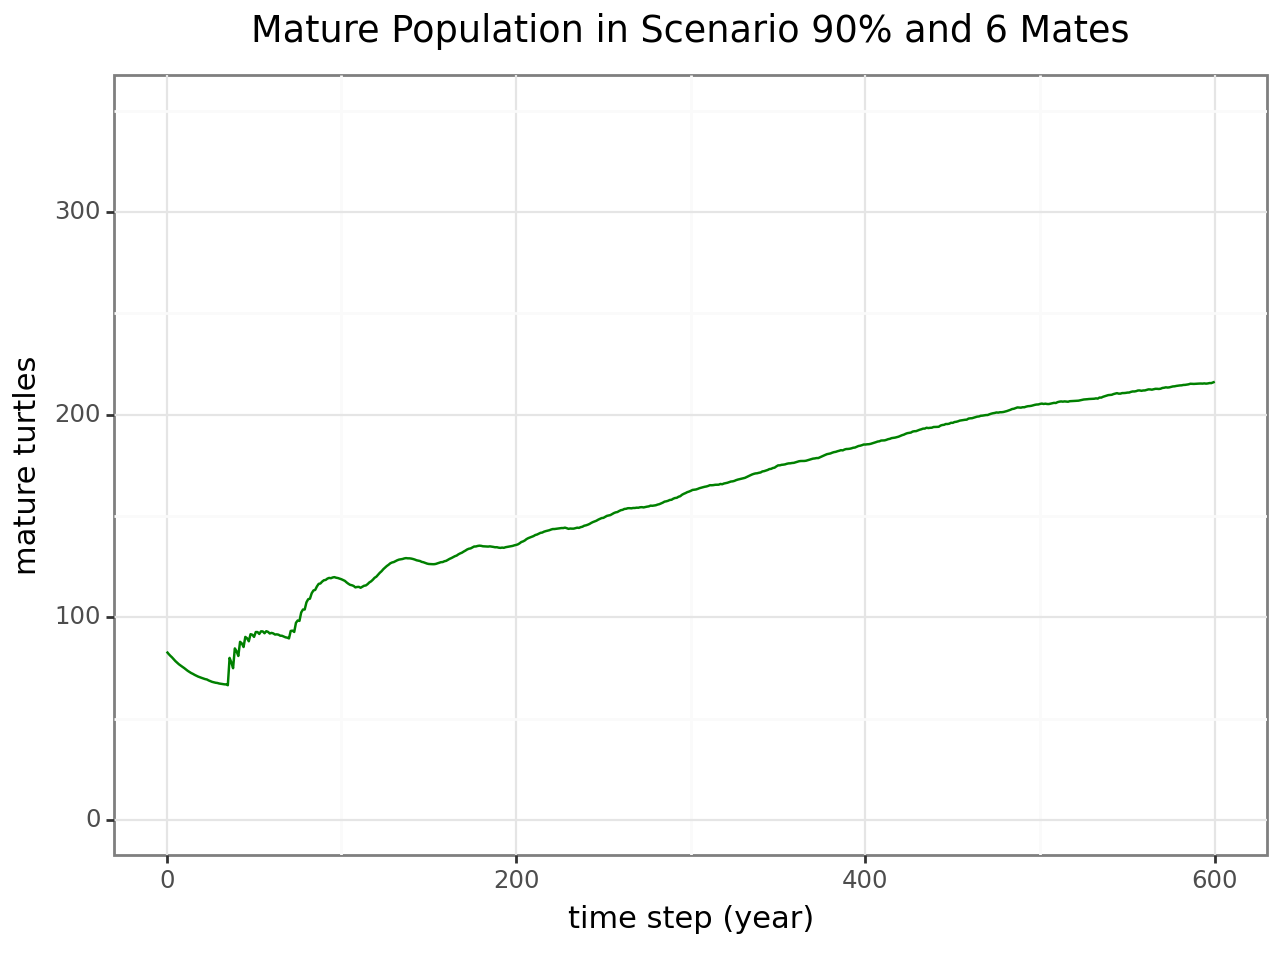

<Figure Size: (640 x 480)>

In [343]:
statistics_plot_mature(scenario_90_6, "90% and 6", "green")

In [52]:
#creates statistical plots for just MATURE FEMALES

def statistics_plot_females(datensatz, name):
    plot = (
        p9.ggplot(datensatz)
        + p9.aes(x="step", y = "mature_females")
        + p9.labs(title = "Mature Females in Scenario " + name + " Mates" )
        + p9.xlab("time step (year)")
        + p9.ylab("number of mature females")
        + p9.geom_line(color = 'orange')
        + p9.ylim(0, 300)
        + p9.stat_summary(geom = 'ribbon', fun_args={'conf.int': 0.95}, alpha=0.3)
        + p9.stat_summary(geom = 'line')
        + p9.theme_bw()
        + p9.theme(plot_title = p9.element_text(hjust = 0.5))

        )
    return plot

In [69]:
#creates statistical plots for the ENTIRE POPULATION

def statistics_plot_all(datensatz, name):
    plot = (
        p9.ggplot(datensatz)
        + p9.aes(x="step", y = "all_turtles")
        + p9.labs(title = "Population Number in Scenario " + name + " Mates")
        + p9.xlab("time step (year)")
        + p9.ylab("number of turtles")
        + p9.geom_line(color = 'chartreuse')
        + p9.ylim(0, 1200)
        + p9.stat_summary(geom = 'ribbon', fun_args={'conf.int': 0.95}, alpha=0.3)
        + p9.stat_summary(geom = 'line')
        + p9.theme_bw()
        + p9.theme(plot_title = p9.element_text(hjust = 0.5))

        )
    return plot

In [336]:
def auswertungs_plot_line(datensatz, name, color_choice):
    plot = (
        p9.ggplot(datensatz, p9.aes(x = "step", y = "all_adult_turtles"))
        + p9.xlab("time step (year)")
        + p9.ylab("mature turtles")
        #+ p9.ylim(0,200)
        + p9.stat_summary(geom = "ribbon", color = color_choice, fun_args={"conf.int":0.95}, alpha = 0.3)
        + p9.labs(title = "Population Number in Scenario " + name + " Mates")
        )
   
    
    return plot
  

In [105]:
def mature_turltes_plot_line (datensatz, name):
    plot = (
        p9.ggplot(datensatz, p9.aes(x = "step", y = "all_adult_turtles"))
        + p9.stat_summary(geom = "ribbon", color = "darkseagreen")
        + p9.labs(title = "Mature Population in Scenario " + name + " Mates"))
    
    print (plot)

In [108]:
#function that schows run numbers in a sub-dataframe

def hol_scenario_run_numbers(datensatz):
    return set(datensatz["run_number"])

In [113]:
def mach_analüse(datensatz, run_numbers: set[int]):

    runs_df = pd.DataFrame(data={"run_number": [], "num_last_standing": [], "num_last_standing_adults": [], "is_extinct": []})
    
    for run_number in run_numbers:
        end_population = int(datensatz.loc[(datensatz["run_number"] == run_number) & (datensatz["step"] == 600)]["all_turtles"])
        end_adult_population = int(datensatz.loc[(datensatz["run_number"] == run_number) & (datensatz["step"] == 600)]["all_adult_turtles"])
        runs_df.loc[len(runs_df)] = [run_number, end_population,end_adult_population, end_population == 0]
    
    return runs_df

In [ ]:
def mach_analüse_ohne_extinct (datensatz, run_numbers: set[int]):
    runs_df = pd.DataFrame(data={"run_number": [], "num_last_standing": [], "num_last_standing_adults": [], "is_extinct": []})
    
    for run_number in run_numbers:
        end_population = int( datensatz.loc[(datensatz["run_number"] == run_number) & (datensatz["step"] == 600)]["all_turtles"])
        end_adult_population = int(datensatz.loc[(datensatz["run_number"] == run_number) & (datensatz["step"] == 600)]["all_adult_turtles"])
        runs_df.loc[len(runs_df)] = [run_)number, end_population,end_adult_population, end_population == 0]
    
    return runs_df

In [129]:
#Funktion, um den Durchschnittswert der in diesem Szenario zuletzt übrig gebliebenen Schildkröten zu bekommen

def mean_last_standing (datensatz):
    return np.mean(datensatz["num_last_standing"])

In [130]:
def mean_last_adult_standing (datensatz):
    return np.mean(datensatz["num_last_standing_adults"])

### Creating Scenario Dataframes

In [54]:
#lists that I need to get the scenario dataframes and name them after their scenarios

ratios_list = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
max_mates_list = [4, 5, 6]
scenario_name_liste = ["scenario_50_4", "scenario_60_4", "scenario_70_4", "scenario_75_4", "scenario_80_4", "scenario_85_4", "scenario_90_4", "scenario_95_4", "scenario_100_4", "scenario_50_5", "scenario_60_5", "scenario_70_5", "scenario_75_5", "scenario_80_5", "scenario_85_5", "scenario_90_5", "scenario_95_5", "scenario_100_5", "scenario_50_6", "scenario_60_6", "scenario_70_6", "scenario_75_6", "scenario_80_6", "scenario_85_6", "scenario_90_6", "scenario_95_6", "scenario_100_6"]

In [56]:
#creates a list of the dataframes that I need for the analysis

results = []

for mates in max_mates_list:
    for ratio in ratios_list:
        scenario = get_scenario_dataframe(ratio, mates, df)
        results.append(scenario)

In [57]:
#names the dataframes in results:list after the scenarios (from scenario_name_liste)

for datensatz, name in zip(results, scenario_name_liste):
    globals()[name] = datensatz 
 # Using globals() to assign variable name dynamically


In [465]:
#ratios and scenario names that I need for the fine analysis 

ratios_list_FEIN = [0.86, 0.87, 0.88, 0.89, 0.91, 0.92, 0.93, 0.94, 0.96, 0.97, 0.98, 0.99]
scenario_name_list_FEIN = ["scenario_86_4", "scenario_87_4", "scenario_88_4", "scenario_89_4", "scenario_91_4", "scenario_92_4", "scenario_93_4", "scenario_94_4", "scenario_96_4", "scenario_97_4", "scenario_98_4", "scenario_99_4", "scenario_86_5", "scenario_87_5", "scenario_88_5", "scenario_89_5", "scenario_91_5", "scenario_92_5", "scenario_93_5", "scenario_94_5", "scenario_96_5", "scenario_97_5", "scenario_98_5", "scenario_99_5","scenario_86_6", "scenario_87_6", "scenario_88_6", "scenario_89_6", "scenario_91_6", "scenario_92_6", "scenario_93_6", "scenario_94_6", "scenario_96_6", "scenario_97_6", "scenario_98_6", "scenario_99_6"]

In [160]:
#creates a list of the dataframes that I need for the analysis FINE

results_FEIN = []

for mates in max_mates_list:
    for ratio in ratios_list_FEIN:
        scenario = get_scenario_dataframe(ratio, mates, df2)
        results_FEIN.append(scenario)

In [ ]:
results_FEIN

In [464]:
results_3 = []
ratios_list_3 = [0.81, 0.82, 0.83, 0.84]
scenario_name_liste_3 = ["scenario_81_4", "scenario_82_4", "scenario_83_4", "scenario_84_4", "scenario_81_5","scenario_81_5", "scenario_82_5", "scenario_83_5", "scenario_84_5","scenario_81_6", "scenario_82_6", "scenario_83_6", "scenario_84_6"]

for mates in max_mates_list:
    for ratio in ratios_list_3:
        scenario = get_scenario_dataframe(ratio, mates, df3)
        results_3.append(scenario)

In [462]:
print(len(results_3))

12


In [ ]:
results_male = []

atios_list_male = [0.1, 0.2, 0.3, 0.4]
scenario_name_liste__male = ["scenario_10_4", "scenario_20_4", "scenario_30_4", "scenario_40_4", "scenario_10_5","scenario_20_5", "scenario_30_5", "scenario_40_5","scenario_10_6", "scenario_20_6", "scenario_30_6", "scenario_40_6"]

for mates in max_mates_list:
    for ratio in ratios_list_3:
        scenario = get_scenario_dataframe(ratio, mates, df_male)
        results_3.append(scenario)

In [162]:
#names the dataframes in results_FEIN:list after the scenarios (from scenario_name_liste_FEIN)

for datensatz, name in zip(results_FEIN, scenario_name_list_FEIN):
    globals()[name] = datensatz 
 # Using globals() to assign variable name dynamically


In [466]:
#names the dataframes in results_3:list after the scenarios (from scenario_name_liste_FEIN)

for datensatz, name in zip(results_3, scenario_name_liste_3):
    globals()[name] = datensatz 
 # Using globals() to assign variable name dynamically


### Plots 

In [72]:
example_run_name_list = ["50% and 4", "60% and 4","70% and 4", "80% and 4", "90% and 4", "100% and 4","50% and 5", "60% and 5","70% and 5", "80% and 5", "90% and 5", "100% and 5", "50% and 6", "60% and 6","70% and 6", "80% and 6", "90% and 6", "100% and 6"]

In [75]:
#example plots

scenario_list = [scenario_50_4, scenario_60_4, scenario_70_4, scenario_80_4, scenario_90_4, scenario_100_4, scenario_50_5, scenario_60_5, scenario_70_5, scenario_80_5, scenario_90_5, scenario_100_5, scenario_50_6, scenario_60_6, scenario_70_6, scenario_80_6, scenario_90_6, scenario_100_6]
example_run_name_list = ["50% and 4", "60% and 4","70% and 4", "80% and 4", "90% and 4", "100% and 4","50% and 5", "60% and 5","70% and 5", "80% and 5", "90% and 5", "100% and 5", "50% and 6", "60% and 6","70% and 6", "80% and 6", "90% and 6", "100% and 6"]
dataframe_list = []

In [ ]:
#plots for mature statistics

for i in range(18):
    this_dataframe = scenario_list[i]
    title = example_run_name_list[i]
    print(statistics_plot_all(this_dataframe, title))

In [ ]:
#plots for mature statistics

for i in range(18):
    this_dataframe = scenario_list[i]
    title = example_run_name_list[i]
    print(statistics_plot_mature(this_dataframe, title))

In [ ]:
#plots for female mature

for i in range(18):
    this_dataframe = scenario_list[i]
    title = example_run_name_list[i]
    print(statistics_plot_females(this_dataframe, title))

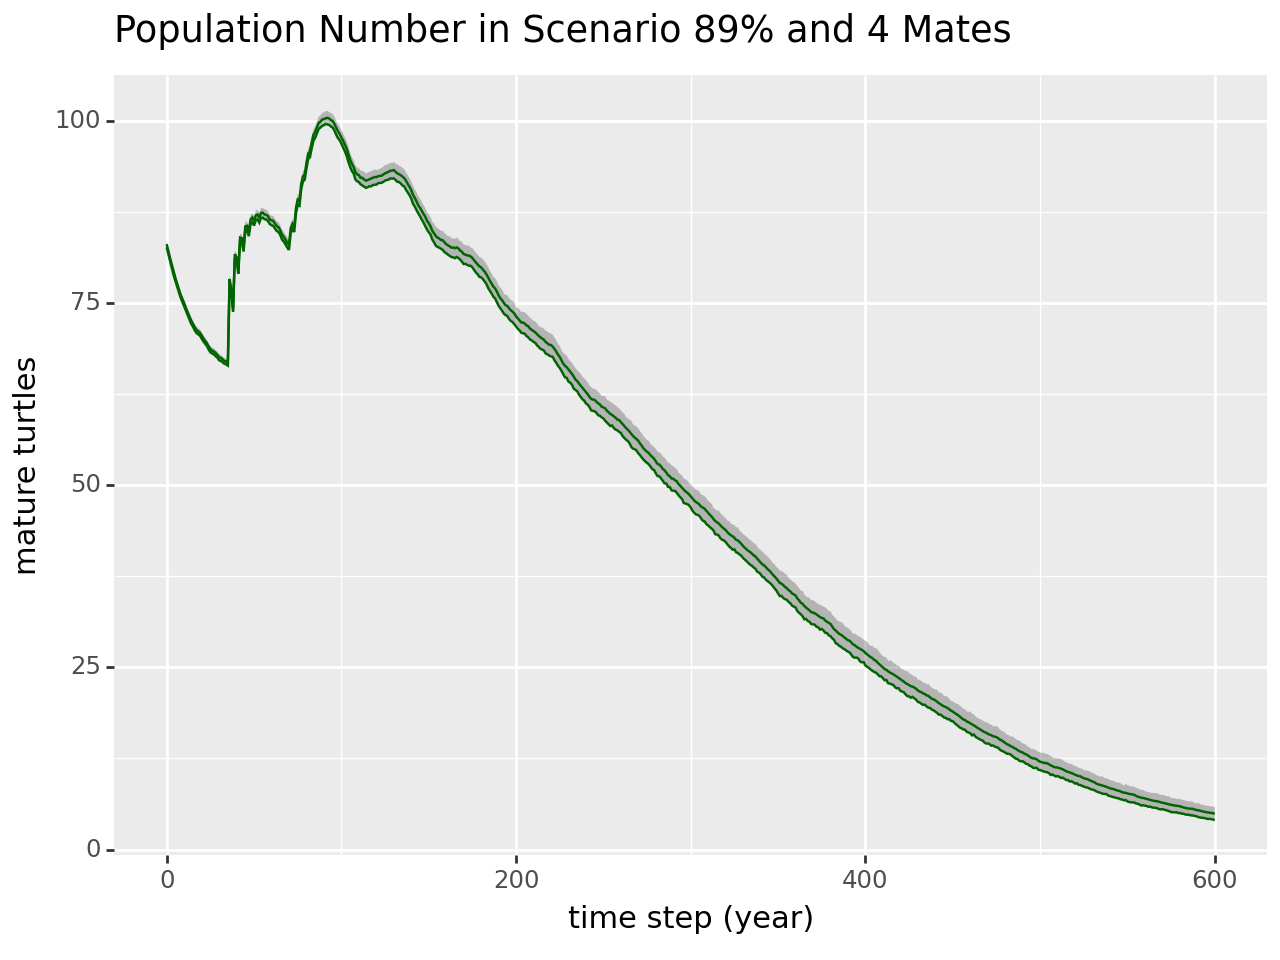

<Figure Size: (640 x 480)>

In [549]:
auswertungs_plot_line(scenario_90_4, "89% and 4", "darkgreen")

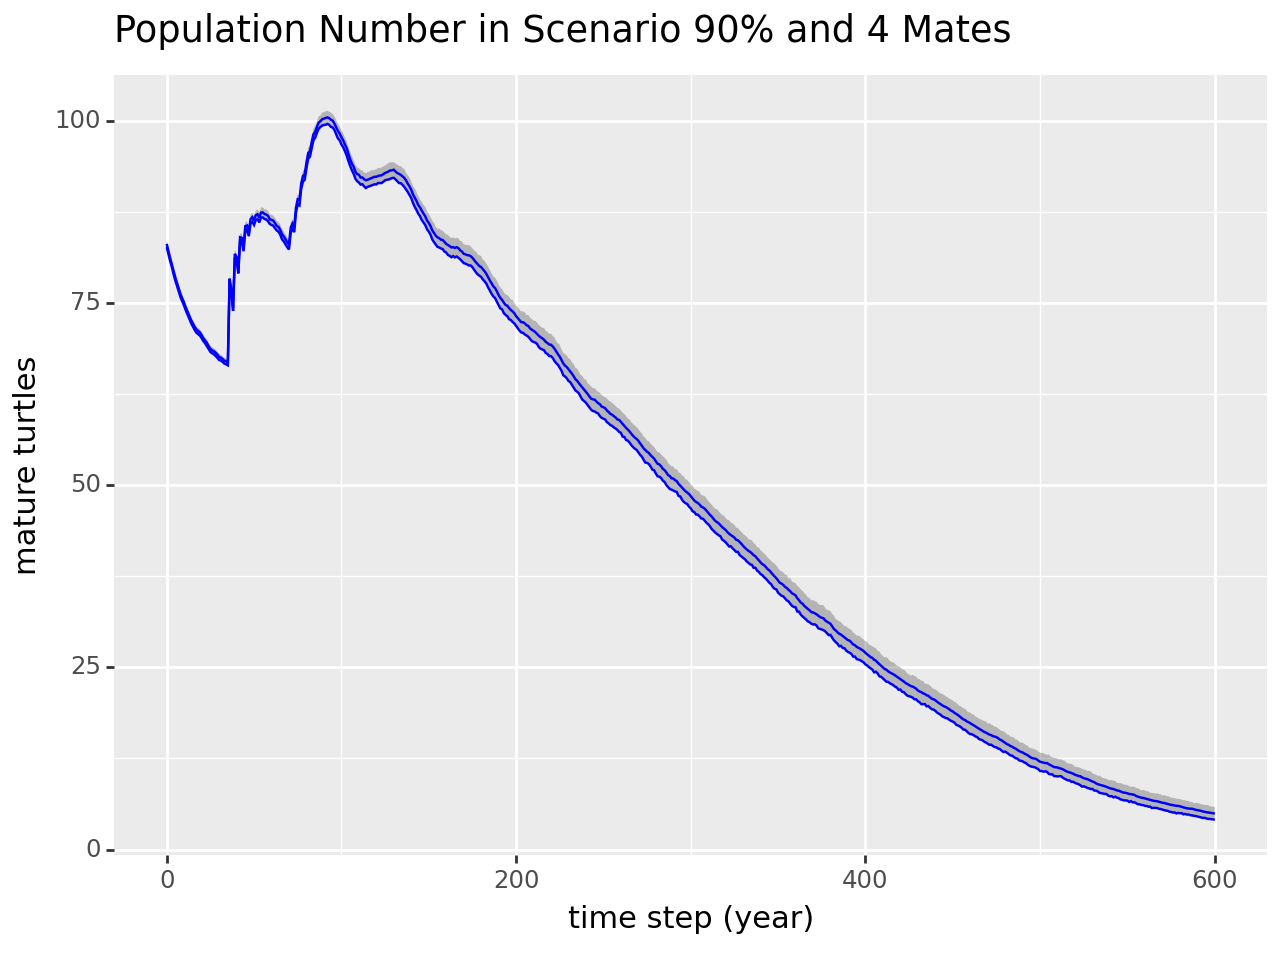

<Figure Size: (640 x 480)>

In [337]:
auswertungs_plot_line(scenario_90_4, "90% and 4", "blue")

## Dataframe erstellen für Übersichtstabellen

In [107]:
import warnings
warnings.filterwarnings("ignore")

In [116]:
#get run number sets for the respective scenarios

run_numbers_liste = []

for scenario_datensatz in results:
    sceanrio_run_numbers = hol_scenario_run_numbers(scenario_datensatz)
    run_numbers_liste.append(sceanrio_run_numbers)

In [123]:
run_numbers_liste_FEIN = []

for scenario_datensatz in results_FEIN:
    sceanrio_run_numbers = hol_scenario_run_numbers(scenario_datensatz)
    run_numbers_liste_FEIN.append(sceanrio_run_numbers)

In [476]:
run_numbers_liste_3 = []

for scenario_datensatz in results_3:
    sceanrio_run_numbers = hol_scenario_run_numbers(scenario_datensatz)
    run_numbers_liste_3.append(sceanrio_run_numbers)

In [117]:
run_number_names_liste = ["run_numbers_50_4", "run_numbers_60_4", "run_numbers_70_4", "run_numbers_75_4", "run_numbers_80_4", "run_numbers_85_4","run_numbers_90_4", "run_numbers_95_4", "run_numbers_100_4", "run_numbers_50_5", "run_numbers_60_5", "run_numbers_70_5", "run_numbers_75_5", "run_numbers_80_5", "run_numbers_85_5","run_numbers_90_5", "run_numbers_95_5", "run_numbers_100_5", "run_numbers_50_6", "run_numbers_60_6", "run_numbers_70_6", "run_numbers_75_6", "run_numbers_80_6", "run_numbers_85_6","run_numbers_90_6", "run_numbers_95_6", "run_numbers_100_6"]

In [124]:
run_number_names_liste_FEIN = ["run_numbers_86_4", "run_numbers_87_4", "run_numbers_88_4", "run_numbers_89_4", "run_numbers_91_4", "run_numbers_92_4", "run_numbers_93_4", "run_numbers_94_4", "run_numbers_96_4", "run_numbers_97_4", "run_numbers_98_4", "run_numbers_99_4", "run_numbers_86_5", "run_numbers_87_5", "run_numbers_88_5", "run_numbers_89_5", "run_numbers_91_5", "run_numbers_92_5", "run_numbers_93_5", "run_numbers_94_5", "run_numbers_96_5", "run_numbers_97_5", "run_numbers_98_5", "run_numbers_99_5", "run_numbers_86_6", "run_numbers_87_6", "run_numbers_88_6", "run_numbers_89_6", "run_numbers_91_6", "run_numbers_92_6", "run_numbers_93_6", "run_numbers_94_6", "run_numbers_96_6", "run_numbers_97_6", "run_numbers_98_6", "run_numbers_99_6"]

In [468]:
run_number_names_liste_3 = ["run_numbers_81_4", "run_numbers_82_4", "run_numbers_83_4", "run_numbers_84_4", "run_numbers_81_5", "run_numbers_82_5", "run_numbers_83_5", "run_numbers_84_5", "run_numbers_81_6", "run_numbers_82_6", "run_numbers_83_6", "run_numbers_84_6"]

In [118]:
#Bennenen der Run number sets nach den Namen der einzelnen Szenarien

for run_numbers, name in zip(run_numbers_liste, run_number_names_liste):
    globals()[name] = run_numbers  # Using globals() to assign variable name dynamically


In [125]:
#FEIN: Bennenen der Run number sets nach den Namen der einzelnen Szenarien

for run_numbers, name in zip(run_numbers_liste_FEIN, run_number_names_liste_FEIN):
    globals()[name] = run_numbers  # Using globals() to assign variable name dynamically


In [477]:
#df3: Bennenen der Run number sets nach den Namen der einzelnen Szenarien

for run_numbers, name in zip(run_numbers_liste_3, run_number_names_liste_3):
    globals()[name] = run_numbers  # Using globals() to assign variable name dynamically


In [119]:
#Analyse auf alle GROB Szenarien anwenden 

auswertungs_liste = []
auswertungs_namen_liste = ["auswertung_50_4", "auswertung_60_4", "auswertung_70_4", "auswertung_75_4", "auswertung_80_4", "auswertung_85_4","auswertung_90_4", "auswertung_95_4", "auswertung_100_4", "auswertung_50_5", "auswertung_60_5", "auswertung_70_5", "auswertung_75_5", "auswertung_80_5", "auswertung_85_5","auswertung_90_5", "auswertung_95_5", "auswertung_100_5", "auswertung_50_6", "auswertung_60_6", "auswertung_70_6", "auswertung_75_6", "auswertung_80_6", "auswertung_85_6","auswertung_90_6", "auswertung_95_6", "auswertung_100_6"]

for i in range(27):
    dieses_scenario = results[i]
    diese_numbers = run_numbers_liste[i]
    auswertung_i = mach_analüse(dieses_scenario, diese_numbers)
    auswertungs_liste.append(auswertung_i)


In [120]:
for dataframe, name in zip(auswertungs_liste, auswertungs_namen_liste):
    globals()[name] = dataframe  # Using globals() to assign variable name dynamically

In [121]:
auswertungs_liste_FEIN = []
auswertungs_namen_liste_FEIN = ["auswertung_86_4", "auswertung_87_4", "auswertung_88_4", "auswertung_89_4", "auswertung_91_4", "auswertung_92_4", "auswertung_93_4", "auswertung_94_4", "auswertung_96_4", "auswertung_97_4", "auswertung_98_4", "auswertung_99_4", "auswertung_86_5", "auswertung_87_5", "auswertung_88_5", "auswertung_89_5", "auswertung_91_5", "auswertung_92_5", "auswertung_93_5", "auswertung_94_5", "auswertung_96_5", "auswertung_97_5", "auswertung_98_5", "auswertung_99_5", "auswertung_86_6", "auswertung_87_6", "auswertung_88_6", "auswertung_89_6", "auswertung_91_6", "auswertung_92_6", "auswertung_93_6", "auswertung_94_6", "auswertung_96_6", "auswertung_97_6", "auswertung_98_6", "auswertung_99_6"]
#len(auswerungs_namen_liste_FEIN) = 36

In [126]:
#Analyse auf alle FEIN Szenarien anwenden 

for i in range(36):
    dieses_scenario = results_FEIN[i]
    diese_numbers = run_numbers_liste_FEIN[i]
    auswertung_i = mach_analüse(dieses_scenario, diese_numbers)
    auswertungs_liste_FEIN.append(auswertung_i)


In [471]:
mach_analüse(scenario_100_4, run_numbers_100_4)

,run_number,num_last_standing,num_last_standing_adults,is_extinct
0,8192,0,0,True
1,8193,0,0,True
2,8194,0,0,True
3,8195,0,0,True
4,8196,0,0,True
...,...,...,...,...
995,8187,0,0,True
996,8188,0,0,True
997,8189,0,0,True
998,8190,0,0,True


In [486]:
auswertungs_namen_liste_3 = ["auswertung_81_4", "auswertung_82_4", "auswertung_83_4", "auswertung_84_4","auswertung_81_5", "auswertung_82_5", "auswertung_83_5", "auswertung_84_5", "auswertung_81_6", "auswertung_82_6", "auswertung_83_6", "auswertung_84_6" ]

In [481]:
#Analyse auf alle df3 Szenarien anwenden 

auswertungs_liste_3 = []

for i in range(12):
    dieses_scenario = results_3[i]
    diese_numbers = run_numbers_liste_3[i]
    auswertung_i = mach_analüse(dieses_scenario, diese_numbers)
    auswertungs_liste_3.append(auswertung_i)

In [137]:
for dataframe, name in zip(auswertungs_liste_FEIN, auswertungs_namen_liste_FEIN):
    globals()[name] = dataframe  # Using globals() to assign variable name dynamically

In [487]:
for dataframe, name in zip(auswertungs_liste_3, auswertungs_namen_liste_3):
    globals()[name] = dataframe  # Using globals() to assign variable name dynamically

In [131]:
def sum_extinction (datensatz):
    return np.sum(datensatz["is_extinct"])

In [379]:
def mean_last_standing_excl_zero (datensatz):
    return np.mean(datensatz[datensatz["num_last_standing"] != 0]["num_last_standing"])

In [376]:
def mean_last_adult_standing_excl_zero(datensatz):
    return np.mean(datensatz[datensatz["num_last_standing_adults"] != 0]["num_last_standing_adults"])


In [382]:
print(mean_last_adult_standing_excl_zero(auswertung_90_4))
print(mean_last_standing_excl_zero(auswertung_90_4))
print(std_last_standing_excl_zero(auswertung_90_4))
print(std_last_standing_adults_excl_zero(auswertung_90_4))

17.083333333333332
38.30902777777778
<function std_last_standing_excl_zero at 0x000001FE6CC251C0>


In [367]:
auswertung_ohne_0 = auswertung_90_4[auswertung_90_4["num_last_standing"] != 0]

In [ ]:
auswertung_ohne_0

In [405]:
def std_last_standing_excl_zero(datensatz):
    return np.std(datensatz[datensatz["num_last_standing"] != 0]["num_last_standing"])

In [425]:
def std_last_standing_adults_excl_zero(datensatz):
    return np.std(datensatz[datensatz["num_last_standing_adults"] != 0]["num_last_standing_adults"])

In [419]:
std_last_standing_adults_excl_zero(auswertung_90_4)

22.063513118066922

In [ ]:
def mean_last_standing (datensatz):
    return np.mean(datensatz["num_last_standing"])

In [132]:
def std_last_standing(datensatz):
    return np.std(datensatz["num_last_standing"])

In [ ]:
def mach_analüse_ohne_extinct (datensatz, run_numbers: set[int]):
    runs_df = pd.DataFrame(data={"run_number": [], "num_last_standing": [], "num_last_standing_adults": [], "is_extinct": []})
    
    for run_number in run_numbers:
        end_population = int( datensatz.loc[(datensatz["run_number"] == run_number) & (datensatz["step"] == 600)]["all_turtles"])
        end_adult_population = int(datensatz.loc[(datensatz["run_number"] == run_number) & (datensatz["step"] == 600)]["all_adult_turtles"])
        runs_df.loc[len(runs_df)] = [run_)number, end_population,end_adult_population, end_population == 0]
    
    return runs_df

In [133]:
def std_last_standing_adults (datensatz):
    return np.std(datensatz["num_last_standing_adults"])

In [134]:
def scenario_description (datensatz, name):
    print(name)
    print("mean: ", mean_last_standing(datensatz))
    print("std: ", std_last_standing(datensatz))
    print("mean adults: ", mean_last_adult_standing(datensatz))
    print ("std adults: ", std_last_standing_adults(datensatz))
    print("extinct: ", sum_extinction(datensatz))

In [138]:
scenario_description(auswertung_86_4, "Szenario 86% & 4 mates")

Szenario 86% & 4 mates
mean:  852.051
std:  63.40039746720836
mean adults:  274.779
std adults:  19.701679090879537
extinct:  0


In [139]:
def auswertungs_tabelle (datensatz, scenario_name):
    
    auswertungs_df = pd.DataFrame(data = {"scenario": [], "mean_last_standing": [], "std_last_standing": [], "mean_last_adult_standing" : [], "std_last_standing_adults": [], "sum_extinction": []})

    scenario = scenario_name
    mean_last_standing_wert = mean_last_standing(datensatz)
    std_last_standing_wert = std_last_standing(datensatz)
    mean_last_adult_standing_wert = mean_last_adult_standing(datensatz)
    std_last_standing_adults_wert = std_last_standing_adults(datensatz)
    sum_extinction_wert = sum_extinction(datensatz)

    auswertungs_df.loc[1] = [scenario, mean_last_standing_wert, std_last_standing_wert, mean_last_adult_standing_wert, std_last_standing_adults_wert, sum_extinction_wert]

    return auswertungs_df

     

In [488]:
datensatz_liste_gesamt = [auswertung_50_4, auswertung_60_4, auswertung_70_4, auswertung_75_4, auswertung_80_4, auswertung_81_4, auswertung_82_4, auswertung_83_4, auswertung_84_4, auswertung_85_4, auswertung_86_4, auswertung_87_4, auswertung_88_4, auswertung_89_4, auswertung_90_4, auswertung_91_4, auswertung_92_4, auswertung_93_4, auswertung_94_4, auswertung_95_4, auswertung_96_4, auswertung_97_4, auswertung_98_4, auswertung_99_4, auswertung_100_4, auswertung_50_5, auswertung_60_5, auswertung_70_5, auswertung_75_5, auswertung_80_5, auswertung_81_5, auswertung_82_5, auswertung_83_5, auswertung_84_5, auswertung_85_5, auswertung_86_5, auswertung_87_5, auswertung_88_5, auswertung_89_5, auswertung_90_5, auswertung_91_5, auswertung_92_5, auswertung_93_5, auswertung_94_5, auswertung_95_5, auswertung_96_5, auswertung_97_5, auswertung_98_5, auswertung_99_5, auswertung_100_5, auswertung_50_6, auswertung_60_6, auswertung_70_6, auswertung_75_6, auswertung_80_6, auswertung_81_6, auswertung_82_6, auswertung_83_6, auswertung_84_6, auswertung_85_6, auswertung_86_6, auswertung_87_6, auswertung_88_6, auswertung_89_6, auswertung_90_6,auswertung_91_6, auswertung_92_6, auswertung_93_6, auswertung_94_6, auswertung_95_6, auswertung_96_6, auswertung_97_6, auswertung_98_6, auswertung_99_6, auswertung_100_6]
scenario_name_liste_gesamt = ["50_4", "60_4", "70_4", "75_4", "80_4", "81_4", "82_4", "83_4", "84_4", "85_4", "86_4", "87_4", "88_4", "89_4", "90_4", "91_4", "92_4", "93_4", "94_4", "95_4","96_4", "97_4", "98_4", "99_4", "100_4", "50_5", "60_5", "70_5", "75_5", "80_5", "81_5", "82_5", "83_5", "84_5", "85_5","86_5", "87_5", "88_5", "89_5", "90_5", "91_5", "92_5", "93_5", "94_5", "95_5","96_5", "97_5", "98_5", "99_5", "100_5", "50_6", "60_6", "70_6", "75_6", "80_6", "81_6", "82_6", "83_6", "84_6", "85_6", "86_6", "87_6", "88_6", "89_6", "90_6", "91_6", "92_6", "93_6", "94_6", "95_6", "96_6", "97_6", "98_6", "99_6", "100_6"]
print(len(datensatz_liste_gesamt))
print(len(scenario_name_liste_gesamt))

75
75


In [489]:
max_mates_für_alle_szenarien_liste = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
print(len(max_mates_für_alle_szenarien_liste))
female_ratios_für_alle_szenarien_liste = [0.5, 0.6, 0.7, 0.75, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9,0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 0.5, 0.6, 0.7, 0.75, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9,0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 0.5, 0.6, 0.7, 0.75, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9,0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0 ]
print(len(female_ratios_für_alle_szenarien_liste))

75
75


In [492]:
def auswertungs_datensatz (df_liste, namen_liste):
    auswertungs_df = pd.DataFrame(data = {"scenario" : [], "max_mates": [], "female_ratio": [], "mean_last_standing": [], "std_last_standing": [], "mean_last_adult_standing": [], "std_last_adult_standing": [], "sum_extinction": []}) 

    for index in range(75):
        scenario = namen_liste[index]
        max_mates = max_mates_für_alle_szenarien_liste[index]
        female_ratio = female_ratios_für_alle_szenarien_liste[index]
        mean_last_standing_wert = mean_last_standing(df_liste[index])
        std_last_standing_wert = std_last_standing(df_liste[index])
        mean_last_adult_standing_wert = mean_last_adult_standing(df_liste[index])
        std_last_standing_adults_wert = std_last_standing_adults(df_liste[index])
        sum_extinction_wert = sum_extinction(df_liste[index])
        
        auswertungs_df.loc[len(auswertungs_df)] = [scenario, max_mates, female_ratio, mean_last_standing_wert, std_last_standing_wert, mean_last_adult_standing_wert, std_last_standing_adults_wert, sum_extinction_wert]

    return auswertungs_df

In [493]:
def auswertungs_datensatz_excl_zero (df_liste, namen_liste):
    auswertungs_df_excl_zero = pd.DataFrame(data = {"Scenario" : [], "Mates": [], "Female Ratio": [], "Final Population Mean": [], "Final Population SD": [], "Final Mature Population Mean": [], "Final Mature Population SD": [], "Extinction Runs": []}) 

    for index in range(75):
        scenario = namen_liste[index]
        max_mates = max_mates_für_alle_szenarien_liste[index]
        female_ratio = female_ratios_für_alle_szenarien_liste[index]
        mean_last_standing_wert = mean_last_standing_excl_zero(df_liste[index])
        std_last_standing_wert = std_last_standing_excl_zero(df_liste[index])
        mean_last_adult_standing_wert = mean_last_adult_standing_excl_zero(df_liste[index])
        std_last_standing_adults_wert = std_last_standing_adults_excl_zero(df_liste[index])
        sum_extinction_wert = sum_extinction(df_liste[index])
        
        auswertungs_df_excl_zero.loc[len(auswertungs_df_excl_zero)] = [scenario, max_mates, female_ratio, mean_last_standing_wert, std_last_standing_wert, mean_last_adult_standing_wert, std_last_standing_adults_wert, sum_extinction_wert]

    return auswertungs_df_excl_zero

In [494]:
überblicks_df_excl_zero_3 = auswertungs_datensatz_excl_zero(datensatz_liste_gesamt, scenario_name_liste_gesamt)

In [496]:
überblicks_df_3 = auswertungs_datensatz(datensatz_liste_gesamt, scenario_name_liste_gesamt)

In [497]:
überblicks_df_3

,scenario,max_mates,female_ratio,mean_last_standing,std_last_standing,mean_last_adult_standing,std_last_adult_standing,sum_extinction
0,50_4,4,0.50,938.250,38.302526,282.294,7.698803,0
1,60_4,4,0.60,969.569,36.002017,283.118,7.288901,0
2,70_4,4,0.70,963.959,35.915558,282.799,7.472255,0
3,75_4,4,0.75,938.938,34.885587,281.815,8.294382,0
4,80_4,4,0.80,899.926,36.439519,280.060,9.474091,0
...,...,...,...,...,...,...,...,...
70,96_6,6,0.96,0.004,0.077356,0.004,0.077356,997
71,97_6,6,0.97,0.000,0.000000,0.000,0.000000,1000
72,98_6,6,0.98,0.000,0.000000,0.000,0.000000,1000
73,99_6,6,0.99,0.000,0.000000,0.000,0.000000,1000


In [495]:
überblicks_df_excl_zero_3

,Scenario,Mates,Female Ratio,Final Population Mean,Final Population SD,Final Mature Population Mean,Final Mature Population SD,Extinction Runs
0,50_4,4,0.50,938.250000,38.302526,282.294000,7.698803,0
1,60_4,4,0.60,969.569000,36.002017,283.118000,7.288901,0
2,70_4,4,0.70,963.959000,35.915558,282.799000,7.472255,0
3,75_4,4,0.75,938.938000,34.885587,281.815000,8.294382,0
4,80_4,4,0.80,899.926000,36.439519,280.060000,9.474091,0
...,...,...,...,...,...,...,...,...
70,96_6,6,0.96,1.333333,0.471405,1.333333,0.471405,997
71,97_6,6,0.97,NaN,NaN,NaN,NaN,1000
72,98_6,6,0.98,NaN,NaN,NaN,NaN,1000
73,99_6,6,0.99,NaN,NaN,NaN,NaN,1000


In [437]:
überblicks_df_excl_zero = auswertungs_datensatz_excl_zero(datensatz_liste_gesamt, scenario_name_liste_gesamt)

In [438]:
überblicks_df_excl_zero

,Scenario,Mates,Female Ratio,Final Population Mean,Final Population SD,Final Mature Population Mean,Final Mature Population SD,Extinction Runs
0,50_4,4,0.50,938.250000,38.302526,282.294000,7.698803,0
1,60_4,4,0.60,969.569000,36.002017,283.118000,7.288901,0
2,70_4,4,0.70,963.959000,35.915558,282.799000,7.472255,0
3,75_4,4,0.75,938.938000,34.885587,281.815000,8.294382,0
4,80_4,4,0.80,899.926000,36.439519,280.060000,9.474091,0
...,...,...,...,...,...,...,...,...
58,96_6,6,0.96,1.333333,0.471405,1.333333,0.471405,997
59,97_6,6,0.97,NaN,NaN,NaN,NaN,1000
60,98_6,6,0.98,NaN,NaN,NaN,NaN,1000
61,99_6,6,0.99,NaN,NaN,NaN,NaN,1000


In [178]:
überblicks_df_FEIN = auswertungs_datensatz(datensatz_liste_gesamt, scenario_name_liste_gesamt)

In [179]:
überblicks_df_FEIN

,scenario,max_mates,female_ratio,mean_last_standing,std_last_standing,mean_last_adult_standing,std_last_adult_standing,sum_extinction
0,50_4,4,0.50,938.250,38.302526,282.294,7.698803,0
1,60_4,4,0.60,969.569,36.002017,283.118,7.288901,0
2,70_4,4,0.70,963.959,35.915558,282.799,7.472255,0
3,75_4,4,0.75,938.938,34.885587,281.815,8.294382,0
4,80_4,4,0.80,899.926,36.439519,280.060,9.474091,0
...,...,...,...,...,...,...,...,...
58,96_6,6,0.96,0.004,0.077356,0.004,0.077356,997
59,97_6,6,0.97,0.000,0.000000,0.000,0.000000,1000
60,98_6,6,0.98,0.000,0.000000,0.000,0.000000,1000
61,99_6,6,0.99,0.000,0.000000,0.000,0.000000,1000


In [150]:
überblicks_df

,scenario,max_mates,female_ratio,mean_last_standing,std_last_standing,mean_last_adult_standing,std_last_adult_standing,sum_extinction
0,50_4,4,0.50,938.250,38.302526,282.294,7.698803,0
1,60_4,4,0.60,969.569,36.002017,283.118,7.288901,0
2,70_4,4,0.70,963.959,35.915558,282.799,7.472255,0
3,75_4,4,0.75,938.938,34.885587,281.815,8.294382,0
4,80_4,4,0.80,899.926,36.439519,280.060,9.474091,0
5,85_4,4,0.81,682.671,212.116079,226.589,69.641325,0
6,90_4,4,0.82,11.033,35.149736,4.920,14.143606,712
7,95_4,4,0.83,0.000,0.000000,0.000,0.000000,1000
8,100_4,4,0.84,0.000,0.000000,0.000,0.000000,1000
9,50_5,4,0.85,957.680,39.569301,282.921,7.196997,0


In [ ]:
überblicks_df

In [188]:
überblicks_df.to_csv(r'C:\Users\Joe\Bachelorarbiet\überblickstabelle_mit_ratios.csv')

In [280]:
#def auswertungs_tabelle (auswertungs_liste):
    
 #   auswertungs_df = pd.DataFrame(data = {"mean_last_standing": [], "std_last_standing": [], "sum_extinction": []})
#
 #   for auswertung in auswertungs_liste:  
  #      mean_last_standing_wert = mean_last_standing(auswertung)
   #     std_last_standing_wert = std_last_standing(auswertung)
    #    sum_extinction_wert = sum_extinction(auswertung)
     #   auswertungs_df.loc[len(auswertungs_df)] = [mean_last_standing_wert, std_last_standing_wert, sum_extinction_wert ]
##
  #  return auswertungs_df

In [272]:
#datensatz_liste = [auswertung_50_4, auswertung_60_4, auswertung_70_4, auswertung_50_5, auswertung_55_5, auswertung_60_5, auswertung_65_5, auswertung_70_5, auswertung_50_6, auswertung_55_6, auswertung_60_6, auswertung_65_6, auswertung_70_6]
#scenario_name_liste = ["50_4", "55_4", "60_4", "65_4", "70_4", "75_4", "80_4", "85_4", "90_4", "95_4", "100_4", "50_5", "55_5", "60_5", "65_5", "70_5", "75_5", "80_5", "85_5", "90_5", "95_5", "100_5", "50_6", "55_6", "60_6", "65_6", "70_6", "75_6", "80_6", "85_6", "90_6", "95_6", "100_6"]
#scenario_name_liste = ["50_4", "55_4", "60_4", "65_4", "70_4", "50_5", "55_5", "60_5", "65_5", "70_5"]


In [180]:
überblicks_df_FEIN_4_mates = überblicks_df_FEIN[überblicks_df_FEIN.max_mates == 4]
überblicks_df_FEIN_5_mates = überblicks_df_FEIN[überblicks_df_FEIN.max_mates == 5]
überblicks_df_FEIN_6_mates = überblicks_df_FEIN[überblicks_df_FEIN.max_mates == 6]


In [439]:
überblicks_df_4_excl_0 = überblicks_df_excl_zero[überblicks_df_excl_zero.Mates == 4]
überblicks_df_5_excl_0 = überblicks_df_excl_zero[überblicks_df_excl_zero.Mates == 5]
überblicks_df_6_excl_0 = überblicks_df_excl_zero[überblicks_df_excl_zero.Mates == 6]

In [498]:
überblicks_df3_4_mates = überblicks_df_3[überblicks_df_3.max_mates == 4]
überblicks_df3_5_mates = überblicks_df_3[überblicks_df_3.max_mates == 5]
überblicks_df3_6_mates = überblicks_df_3[überblicks_df_3.max_mates == 6]

In [499]:
überblicks_df3_4_excl_0 = überblicks_df_excl_zero_3[überblicks_df_excl_zero_3.Mates == 4]
überblicks_df3_5_excl_0 = überblicks_df_excl_zero_3[überblicks_df_excl_zero_3.Mates == 5]
überblicks_df3_6_excl_0 = überblicks_df_excl_zero_3[überblicks_df_excl_zero_3.Mates == 6]

In [442]:
überblicks_df_5_excl_0
überblicks_df_5_excl_0.to_csv(r'C:\Users\Joe\Bachelorarbiet\überblickstabelle_5_excl_0.csv')

In [441]:
überblicks_df_6_excl_0

,Scenario,Mates,Female Ratio,Final Population Mean,Final Population SD,Final Mature Population Mean,Final Mature Population SD,Extinction Runs
42,50_6,6,0.50,972.232000,42.379313,282.985000,7.420834,0
43,60_6,6,0.60,1025.396000,41.598548,284.628000,6.531280,0
44,70_6,6,0.70,1036.136000,37.943899,284.942000,5.975336,0
45,75_6,6,0.75,1020.899000,37.821169,284.238000,6.511172,0
46,80_6,6,0.80,986.122000,39.759441,283.591000,7.407140,0
47,85_6,6,0.85,933.706000,41.687187,281.283000,8.990268,0
48,86_6,6,0.86,961.010000,46.370507,282.187000,8.311199,0
49,87_6,6,0.87,942.874000,46.804211,281.744000,9.230301,0
50,88_6,6,0.88,923.860000,46.871701,281.103000,9.472085,0
51,89_6,6,0.89,898.915000,54.692081,278.291000,13.926964,0


In [443]:
überblicks_df_4_excl_0
überblicks_df_4_excl_0.to_csv(r'C:\Users\Joe\Bachelorarbiet\überblickstabelle_4_excl_0.csv')

In [444]:
überblicks_df_6_excl_0
überblicks_df_6_excl_0.to_csv(r'C:\Users\Joe\Bachelorarbiet\überblickstabelle_6_excl_0.csv')

In [182]:
überblicks_df_FEIN_4_mates

,scenario,max_mates,female_ratio,mean_last_standing,std_last_standing,mean_last_adult_standing,std_last_adult_standing,sum_extinction
0,50_4,4,0.50,938.250,38.302526,282.294,7.698803,0
1,60_4,4,0.60,969.569,36.002017,283.118,7.288901,0
2,70_4,4,0.70,963.959,35.915558,282.799,7.472255,0
3,75_4,4,0.75,938.938,34.885587,281.815,8.294382,0
4,80_4,4,0.80,899.926,36.439519,280.060,9.474091,0
5,85_4,4,0.85,682.671,212.116079,226.589,69.641325,0
6,86_4,4,0.86,852.051,63.400397,274.779,19.701679,0
7,87_4,4,0.87,782.196,144.409797,257.993,46.978537,3
8,88_4,4,0.88,631.288,229.593595,212.462,75.981001,5
9,89_4,4,0.89,366.110,251.255388,126.977,84.939970,54


In [183]:
überblicks_df_FEIN_5_mates

,scenario,max_mates,female_ratio,mean_last_standing,std_last_standing,mean_last_adult_standing,std_last_adult_standing,sum_extinction
21,50_5,5,0.50,957.680,39.569301,282.921,7.196997,0
22,60_5,5,0.60,1001.022,39.644086,284.152,6.572282,0
23,70_5,5,0.70,1005.608,38.016685,284.519,6.403877,0
24,75_5,5,0.75,985.312,37.488247,283.579,6.936697,0
25,80_5,5,0.80,951.893,36.615291,282.449,7.770804,0
26,85_5,5,0.85,888.030,56.292887,278.733,15.781752,1
27,86_5,5,0.86,916.734,43.375883,280.525,9.824326,0
28,87_5,5,0.87,894.593,52.643531,278.541,14.237356,0
29,88_5,5,0.88,874.927,48.040313,276.543,12.619752,0
30,89_5,5,0.89,832.337,104.817982,269.168,31.900592,2


In [184]:
überblicks_df_FEIN_6_mates

,scenario,max_mates,female_ratio,mean_last_standing,std_last_standing,mean_last_adult_standing,std_last_adult_standing,sum_extinction
42,50_6,6,0.50,972.232,42.379313,282.985,7.420834,0
43,60_6,6,0.60,1025.396,41.598548,284.628,6.531280,0
44,70_6,6,0.70,1036.136,37.943899,284.942,5.975336,0
45,75_6,6,0.75,1020.899,37.821169,284.238,6.511172,0
46,80_6,6,0.80,986.122,39.759441,283.591,7.407140,0
47,85_6,6,0.85,933.706,41.687187,281.283,8.990268,0
48,86_6,6,0.86,961.010,46.370507,282.187,8.311199,0
49,87_6,6,0.87,942.874,46.804211,281.744,9.230301,0
50,88_6,6,0.88,923.860,46.871701,281.103,9.472085,0
51,89_6,6,0.89,898.915,54.692081,278.291,13.926964,0


In [283]:
überblicks_df_4_mates

,scenario,max_mates,female_ratio,mean_last_standing,std_last_standing,mean_last_adult_standing,std_last_adult_standing,sum_extinction
0,50_4,4,0.50,938.250,38.302526,282.294,7.698803,0
1,60_4,4,0.60,969.569,36.002017,283.118,7.288901,0
2,70_4,4,0.70,963.959,35.915558,282.799,7.472255,0
3,75_4,4,0.75,938.938,34.885587,281.815,8.294382,0
4,80_4,4,0.80,899.926,36.439519,280.060,9.474091,0
5,85_4,4,0.85,682.671,212.116079,226.589,69.641325,0
6,90_4,4,0.90,11.033,35.149736,4.920,14.143606,712
7,95_4,4,0.95,0.000,0.000000,0.000,0.000000,1000
8,100_4,4,1.00,0.000,0.000000,0.000,0.000000,1000


In [208]:
x = überblicks_df_4_mates["female_ratio"]
classes = ["scenarios with 4 mates", "scenarios with 5 mates", "scenarios with 6 mates"]
y1 = überblicks_df_4_mates["mean_last_adult_standing"]
y2 = überblicks_df_5_mates["mean_last_adult_standing"]
y3 = überblicks_df_6_mates["mean_last_adult_standing"]

In [288]:
überblicks_df_6_mates

,scenario,max_mates,female_ratio,mean_last_standing,std_last_standing,mean_last_adult_standing,std_last_adult_standing,sum_extinction
18,50_6,6,0.50,972.232,42.379313,282.985,7.420834,0
19,60_6,6,0.60,1025.396,41.598548,284.628,6.531280,0
20,70_6,6,0.70,1036.136,37.943899,284.942,5.975336,0
21,75_6,6,0.75,1020.899,37.821169,284.238,6.511172,0
22,80_6,6,0.80,986.122,39.759441,283.591,7.407140,0
23,85_6,6,0.85,933.706,41.687187,281.283,8.990268,0
24,90_6,6,0.90,651.181,261.182913,216.279,83.671639,28
25,95_6,6,0.95,0.076,1.574238,0.033,0.621217,996
26,100_6,6,1.00,0.000,0.000000,0.000,0.000000,1000


In [186]:
e4 = []
e5 = []
e6 = []

for i in range (21):
    e4.append(überblicks_df_FEIN_4_mates["std_last_adult_standing"][i])

for i in range (21, 42):
    e5.append(überblicks_df_FEIN_5_mates["std_last_adult_standing"][i])

for i in range (42, 63):
    e6.append(überblicks_df_FEIN_6_mates["std_last_adult_standing"][i])

In [187]:
e5

[7.196996526329578,
 6.5722824041576295,
 6.403876872645195,
 6.936696548069548,
 7.770804269829475,
 15.781752469228504,
 9.824325676604985,
 14.237356461085042,
 12.619752414370103,
 31.90059209481855,
 75.392027104993,
 93.75888461367273,
 62.19505703028176,
 21.66462829129547,
 3.0839972438379384,
 0.0,
 0.031606961258558226,
 0.0,
 0.0,
 0.0,
 0.0]

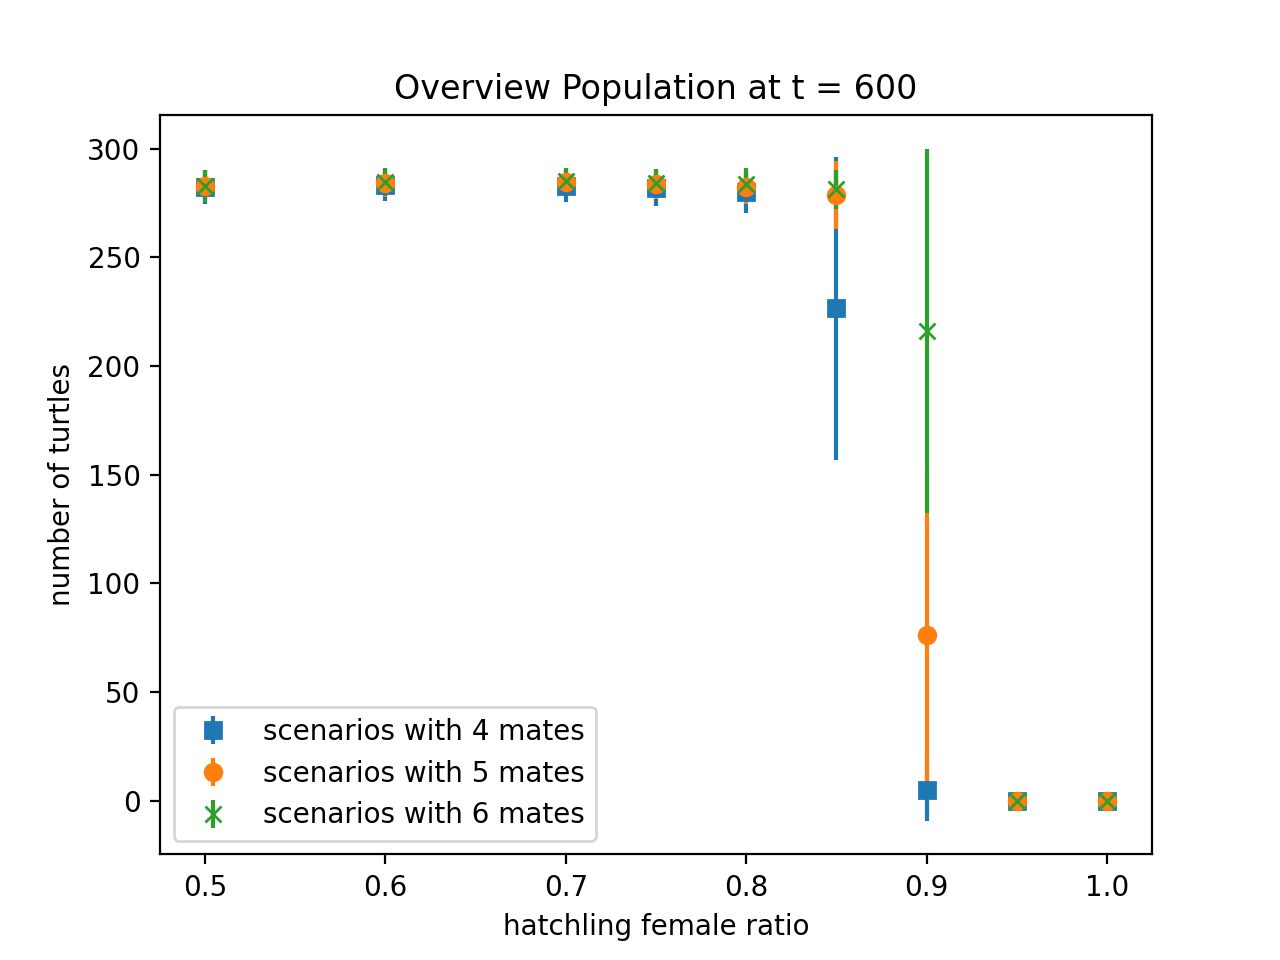

In [316]:
#plt.scatter(x, y = y1, color = "yellow")
plt.errorbar(x, y = y1, yerr = e4, fmt = "s")
             #plt.scatter(x, y = y2)
plt.errorbar(x, y = y2, yerr = e5, fmt = "o")
#plt.scatter(x, y = y3)
plt.errorbar(x, y = y3, yerr = e6, fmt = "x")
plt.legend(labels=classes)
plt.title("Overview Population at t = 600")
plt.xlabel("hatchling female ratio")
plt.ylabel("number of turtles")
plt.show()

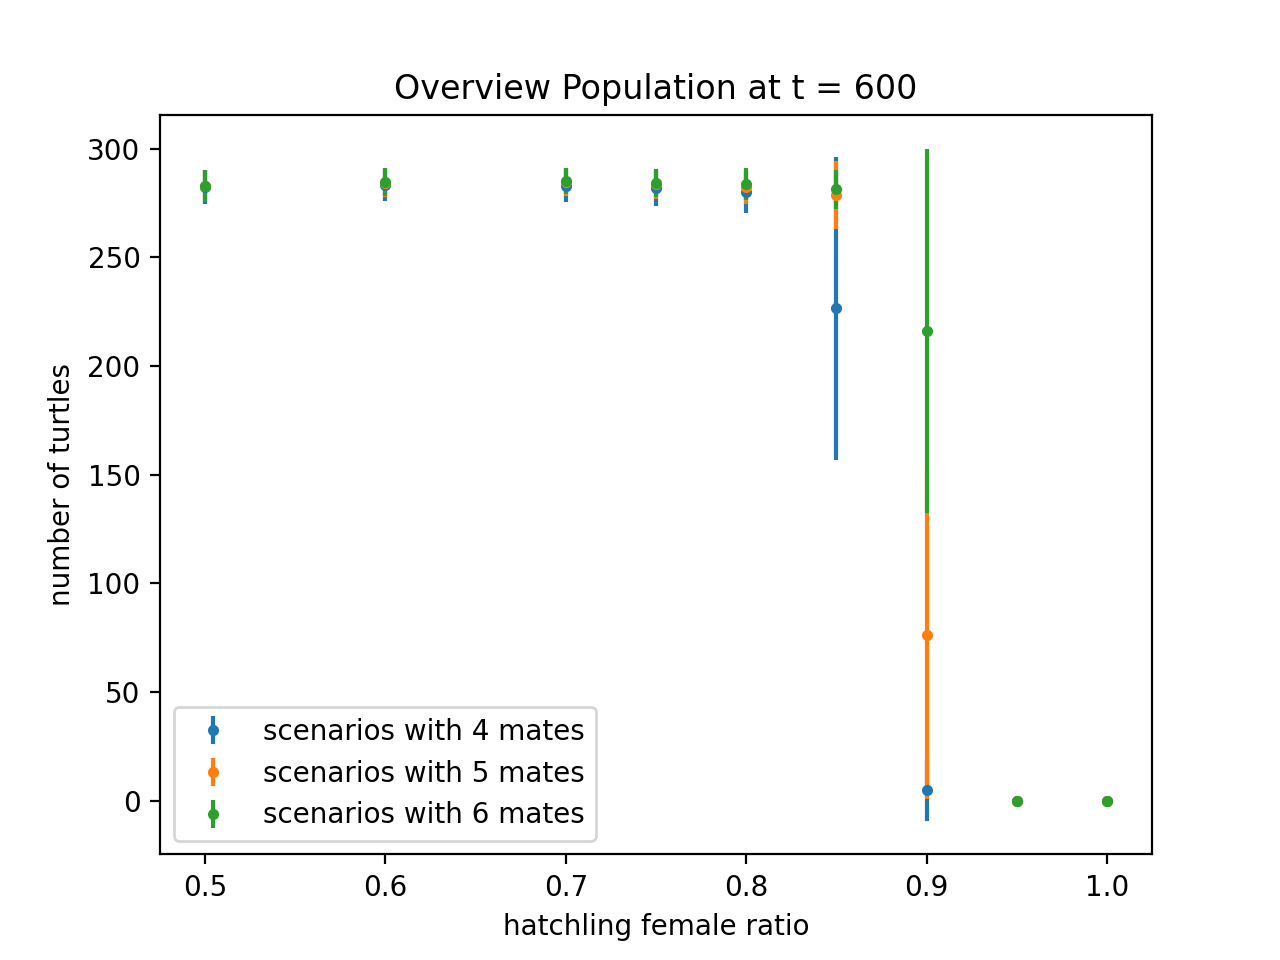

In [345]:
#plt.scatter(x, y = y1, color = "yellow")
plt.errorbar(x, y = y1, yerr = e4, fmt = ".")
             #plt.scatter(x, y = y2)
plt.errorbar(x, y = y2, yerr = e5, fmt = ".")
#plt.scatter(x, y = y3)
plt.errorbar(x, y = y3, yerr = e6, fmt = ".")
plt.legend(labels=classes)
plt.title("Overview Population at t = 600")
plt.xlabel("hatchling female ratio")
plt.ylabel("number of turtles")
plt.show()

In [ ]:
plt.errorbar(x, y = y1, yerr = e4, fmt = ".", color = "blue")
plt.show()
plt.errorbar(x, y = y2, yerr = e5, fmt = ".", color = "orange")
plt.show()
plt.errorbar(x, y = y3, yerr = e6, fmt = ".", color = "green")
plt.show()

In [ ]:

x_2 = [0.8, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]

y4 = überblicks_df_FEIN_4_mates["sum_extinction"]
y5 = überblicks_df_FEIN_5_mates["sum_extinction"]
y6 = überblicks_df_FEIN_6_mates["sum_extinction"]


plt.bar(x_2, y4, width = 0.3, align = "center", edgecolor = 'black') 
#plt.bar(x_", y = y5, 0.4, label = '5 mates') 
#plt.bar(x + 0.2, y = y6, 0.4, label = "6 mates")
  
#plt.xticks(X_axis, X) 
plt.xlabel("Groups") 
plt.ylabel("Number of Students") 
plt.title("Number of Students in each group") 
plt.legend() 
plt.show() 


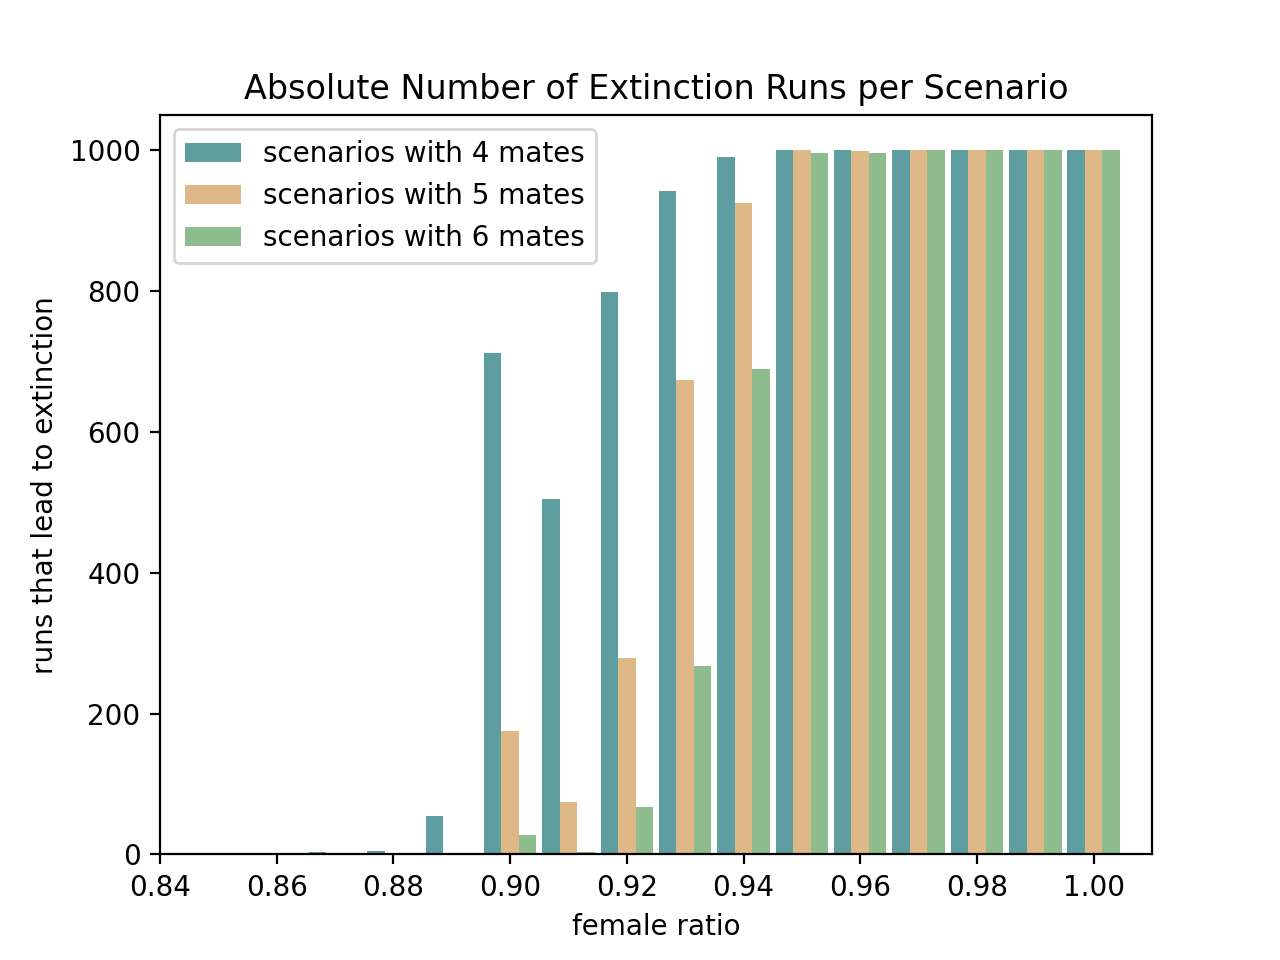

In [245]:
x = überblicks_df_FEIN_4_mates["female_ratio"]


plt.bar(x - 0.003, y4, width=0.003, align='center', label='scenarios with 4 mates', color = "cadetblue")
plt.bar(x , y5, width=0.003, align='center', label='scenarios with 5 mates', color = "burlywood")
plt.bar(x + 0.003, y6, width=0.003, align='center', label='scenarios with 6 mates', color = "darkseagreen")

# Setting x-axis limits
plt.xlim(0.85, 1.01)
plt.xticks(np.arange(0.84, 1, step=0.02))

# Adding labels and title
plt.xlabel('female ratio')
plt.ylabel('runs that lead to extinction')
plt.title('Absolute Number of Extinction Runs per Scenario')
plt.legend()

# Displaying the plot
plt.show()

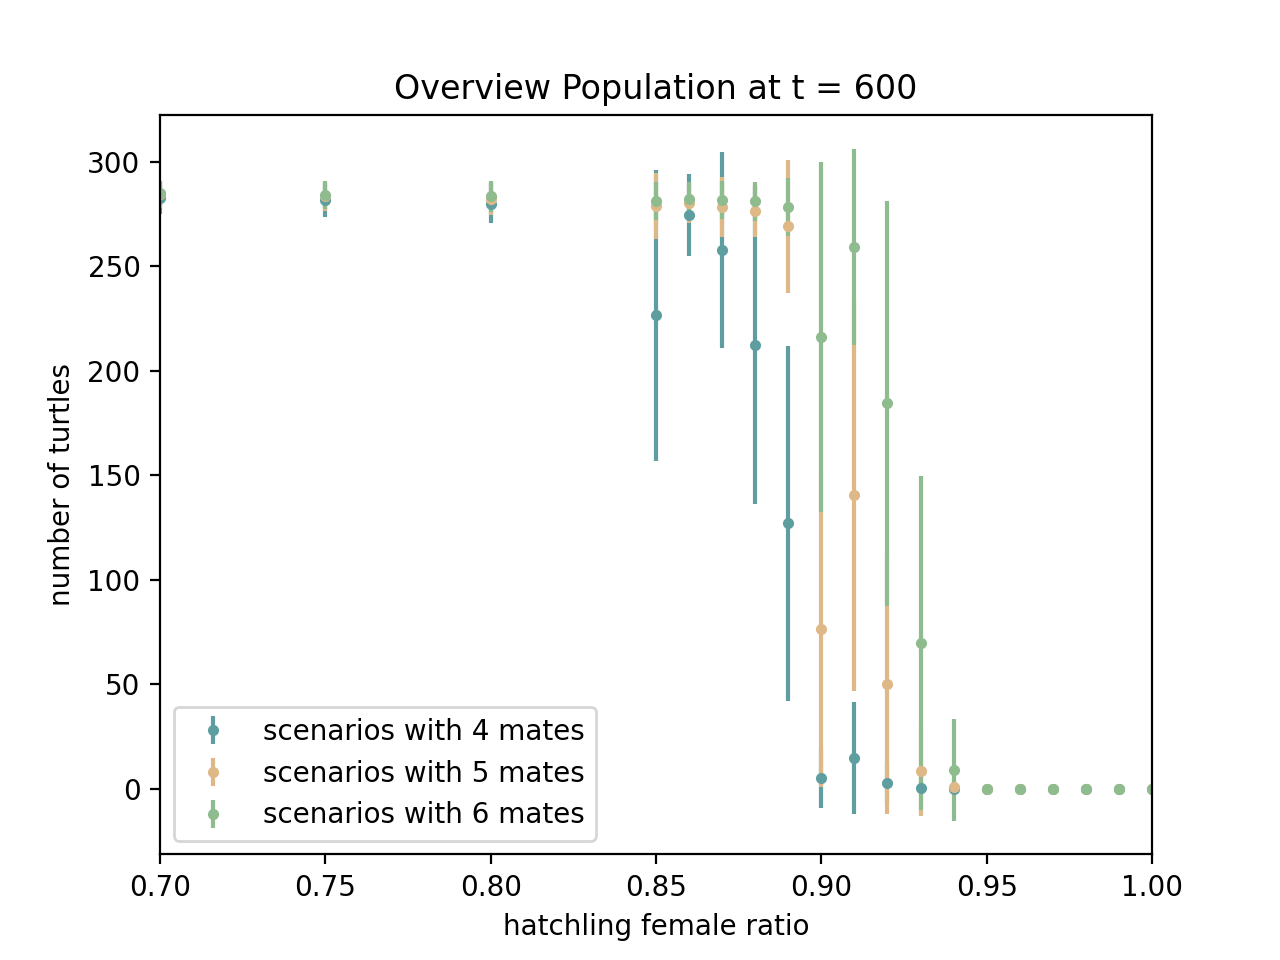

In [270]:
x = überblicks_df_FEIN_4_mates["female_ratio"]
classes = ["scenarios with 4 mates", "scenarios with 5 mates", "scenarios with 6 mates"]

#plt.scatter(x, y = y1, color = "yellow")
plt.errorbar(x, y = y7, yerr = e4, fmt = ".", color = "cadetblue")
             #plt.scatter(x, y = y2)
plt.errorbar(x, y = y8, yerr = e5, fmt = ".", color = "burlywood")
#plt.scatter(x, y = y3)
plt.errorbar(x, y = y9, yerr = e6, fmt = ".", color = "darkseagreen")
plt.legend(labels=classes)
plt.title("Overview Population at t = 600")
plt.xlabel("hatchling female ratio")
plt.ylabel("number of turtles")
plt.xlim(0.7, 1.0)
plt.show()

In [345]:
auswertung_90_4

,run_number,num_last_standing,num_last_standing_adults,is_extinct
0,6144,0,0,True
1,6145,0,0,True
2,6146,0,0,True
3,6147,0,0,True
4,6148,0,0,True
...,...,...,...,...
995,6139,0,0,True
996,6140,16,8,False
997,6141,0,0,True
998,6142,0,0,True


In [349]:
auswertung_ohne_0 = auswertung_90_4[auswertung_90_4.is_extinct == False]

In [350]:
auswertung_ohne_0

,run_number,num_last_standing,num_last_standing_adults,is_extinct
5,6149,58,31,False
11,6155,19,13,False
13,6157,33,18,False
15,6159,362,135,False
18,6162,1,1,False
...,...,...,...,...
987,6131,70,36,False
993,6137,90,41,False
994,6138,16,13,False
996,6140,16,8,False


In [446]:
y11 = überblicks_df_4_excl_0["Final Mature Population Mean"]
y12 = überblicks_df_5_excl_0["Final Mature Population Mean"]
y13 = überblicks_df_6_excl_0["Final Mature Population Mean"]

In [448]:
e11 = []
e12 = []
e13 = []

for i in range (21):
    e11.append(überblicks_df_4_excl_0["Final Mature Population SD"][i])

for i in range (21, 42):
    e12.append(überblicks_df_5_excl_0["Final Mature Population SD"][i])

for i in range (42, 63):
    e13.append(überblicks_df_6_excl_0["Final Mature Population SD"][i])

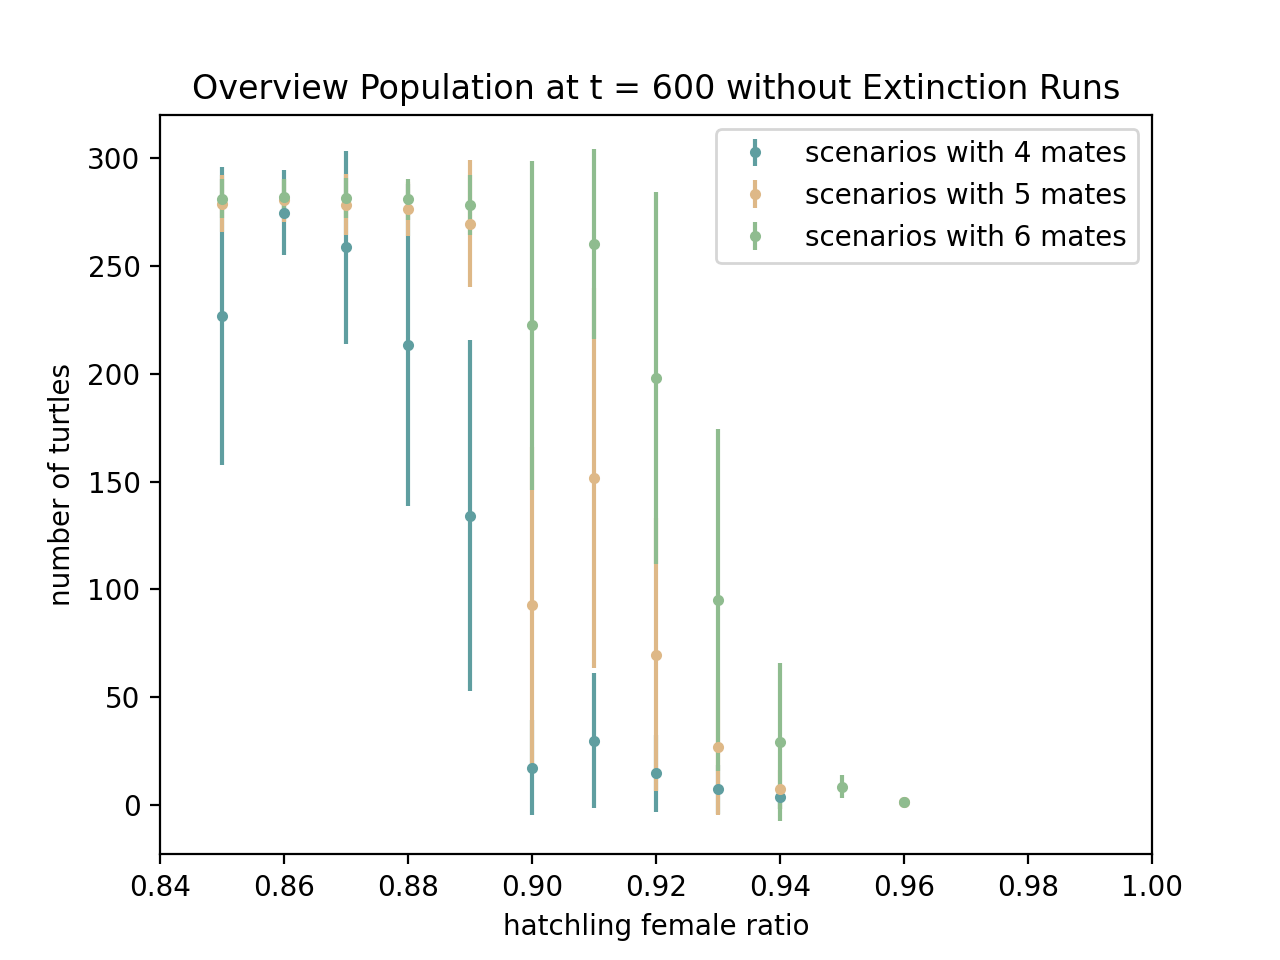

In [556]:
x = überblicks_df_4_excl_0["Female Ratio"]
classes = ["scenarios with 4 mates", "scenarios with 5 mates", "scenarios with 6 mates"]

plt.errorbar(x, y = y11, yerr = e11, fmt = ".", color = "cadetblue")
plt.errorbar(x, y = y12, yerr = e12, fmt = ".", color = "burlywood")
plt.errorbar(x, y = y13, yerr = e13, fmt = ".", color = "darkseagreen")
plt.legend(labels=classes)
plt.title("Overview Population at t = 600 without Extinction Runs")
plt.xlabel("hatchling female ratio")
plt.ylabel("number of turtles")
plt.xlim(0.84, 1.0)
plt.show()

In [525]:
überblicks_df3_4_mates

,scenario,max_mates,female_ratio,mean_last_standing,std_last_standing,mean_last_adult_standing,std_last_adult_standing,sum_extinction
0,50_4,4,0.50,938.250,38.302526,282.294,7.698803,0
1,60_4,4,0.60,969.569,36.002017,283.118,7.288901,0
2,70_4,4,0.70,963.959,35.915558,282.799,7.472255,0
3,75_4,4,0.75,938.938,34.885587,281.815,8.294382,0
4,80_4,4,0.80,899.926,36.439519,280.060,9.474091,0
5,81_4,4,0.81,932.102,39.508500,281.671,8.718874,0
6,82_4,4,0.82,919.896,38.287977,281.682,8.427744,0
7,83_4,4,0.83,906.325,40.238059,280.696,9.014410,0
8,84_4,4,0.84,892.896,39.671037,279.696,10.085613,0
9,85_4,4,0.85,682.671,212.116079,226.589,69.641325,0


In [526]:
e34 = []
e35 = []
e36 = []

for i in range (25):
    e34.append(überblicks_df3_4_mates["std_last_adult_standing"][i])

for i in range (25, 50):
    e35.append(überblicks_df3_5_mates["std_last_adult_standing"][i])

for i in range (50, 75):
    e36.append(überblicks_df3_6_mates["std_last_adult_standing"][i])

In [528]:
y34 = überblicks_df3_4_mates["mean_last_adult_standing"]
y35 = überblicks_df3_5_mates["mean_last_adult_standing"]
y36 = überblicks_df3_6_mates["mean_last_adult_standing"]

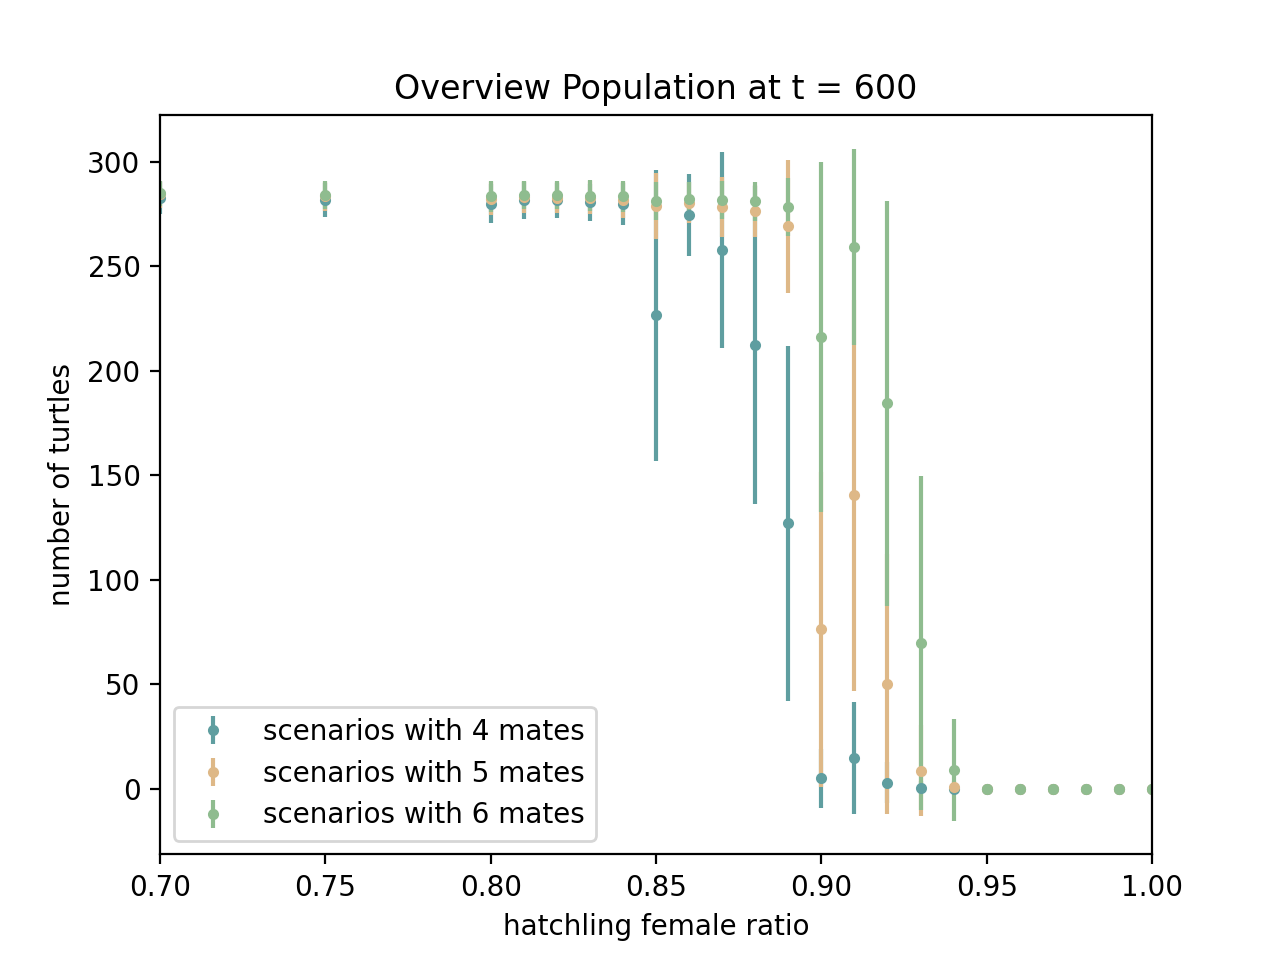

In [551]:
x = überblicks_df3_4_mates["female_ratio"]
classes = ["scenarios with 4 mates", "scenarios with 5 mates", "scenarios with 6 mates"]

plt.errorbar(x, y = y34, yerr = e34, fmt = ".", color = "cadetblue")
plt.errorbar(x, y = y35, yerr = e35, fmt = ".", color = "burlywood")
plt.errorbar(x, y = y36, yerr = e36, fmt = ".", color = "darkseagreen")
plt.legend(labels=classes)
plt.title("Overview Population at t = 600")
plt.xlabel("hatchling female ratio")
plt.ylabel("number of turtles")
plt.xlim(0.7, 1.0)
plt.show()

#color = "cadetblue", , color = "burlywood", color = "darkseagreen"